In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,  precision_recall_curve

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
data=pd.read_csv('./Email.csv')
data=data[['label_num', 'text']]
data.head(10)

,label_num,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...
5,0,Subject: ehronline web address change\r\nthis ...
6,0,Subject: spring savings certificate - take 30 ...
7,1,Subject: looking for medication ? we ` re the ...
8,0,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,0,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(nltk.corpus.stopwords.words('english'))

# Preprocessing function
def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = nltk.tokenize.word_tokenize(text)
    # Remove stopwords
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

# Apply preprocessing
data['text'] = data['text'].apply(preprocess)

# Preview
print(data[['label_num', 'text']].head())

   label_num                                               text
0          0  subject enron methanol meter 988291 follow not...
1          0  subject hpl nom january 9 2001 see attached fi...
2          0  subject neon retreat ho ho ho around wonderful...
3          1  subject photoshop windows office cheap main tr...
4          0  subject indian springs deal book teco pvr reve...


In [ ]:
X=CountVectorizer().fit_transform(data['text'])
y=data['label_num']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.978743961352657
Precision: 0.9413680781758957
Recall: 0.9863481228668942
Confusion Matrix:
 [[724  18]
 [  4 289]]


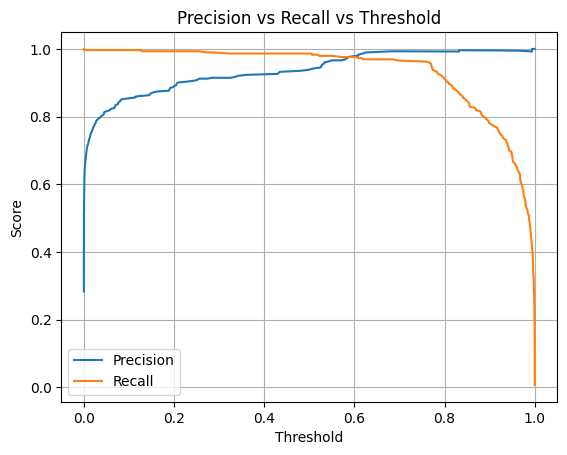

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision vs Recall vs Threshold')
plt.grid()
plt.show()
#plot to show how the Precision and Recall scores vary by threshold
